In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('calories.csv')
df2=pd.read_csv('exercise.csv')

In [3]:
df1.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [4]:
df2.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [5]:
df=pd.merge(df2,df1,on='User_ID')

In [6]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [7]:
df.shape

(15000, 9)

In [8]:
df.User_ID.duplicated().sum()

0

In [9]:
df.drop(['User_ID'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [11]:
df.describe()

Age        Height        Weight      Duration    Heart_Rate  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      42.789800    174.465133     74.966867     15.530600     95.518533   
std       16.980264     14.258114     15.035657      8.319203      9.583328   
min       20.000000    123.000000     36.000000      1.000000     67.000000   
25%       28.000000    164.000000     63.000000      8.000000     88.000000   
50%       39.000000    175.000000     74.000000     16.000000     96.000000   
75%       56.000000    185.000000     87.000000     23.000000    103.000000   
max       79.000000    222.000000    132.000000     30.000000    128.000000   

          Body_Temp      Calories  
count  15000.000000  15000.000000  
mean      40.025453     89.539533  
std        0.779230     62.456978  
min       37.100000      1.000000  
25%       39.600000     35.000000  
50%       40.200000     79.000000  
75%       40.600000    138.000000  
max       41.500000    314.000000

In [12]:
df.Gender.describe()

count      15000
unique         2
top       female
freq        7553
Name: Gender, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001507DDA2248>,
      dtype=object)

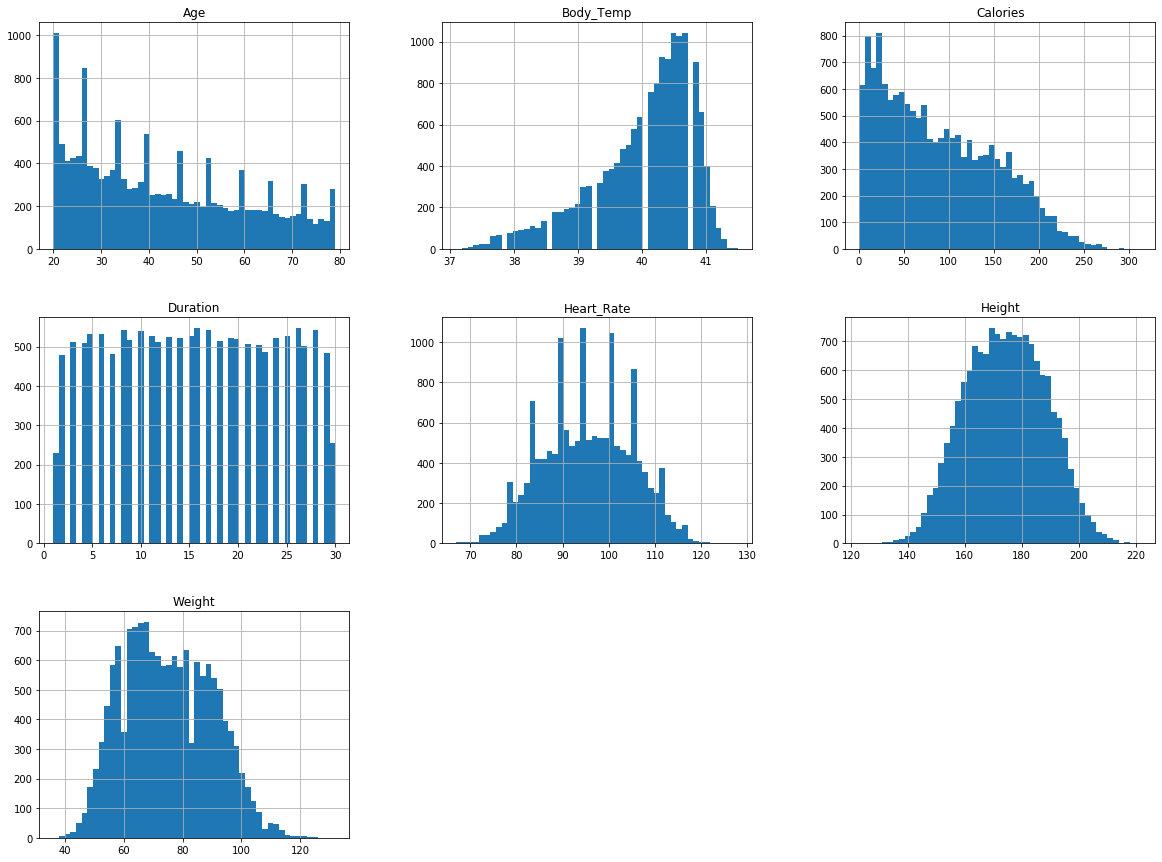

In [13]:
df.hist(bins=50,figsize=(20,15))

In [14]:
print('count of duration',len(df.Duration.value_counts()))
df.Duration.value_counts()

count of duration 30


26.0    548
16.0    546
17.0    543
28.0    541
8.0     541
10.0    539
5.0     533
6.0     533
11.0    528
15.0    527
25.0    526
13.0    523
14.0    522
24.0    521
19.0    521
20.0    518
9.0     517
18.0    514
12.0    512
3.0     511
4.0     509
21.0    506
22.0    505
27.0    502
23.0    485
29.0    483
7.0     482
2.0     479
30.0    255
1.0     230
Name: Duration, dtype: int64

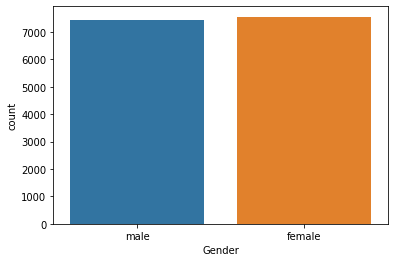

In [15]:
sns.countplot(df['Gender'])

In [16]:
df.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

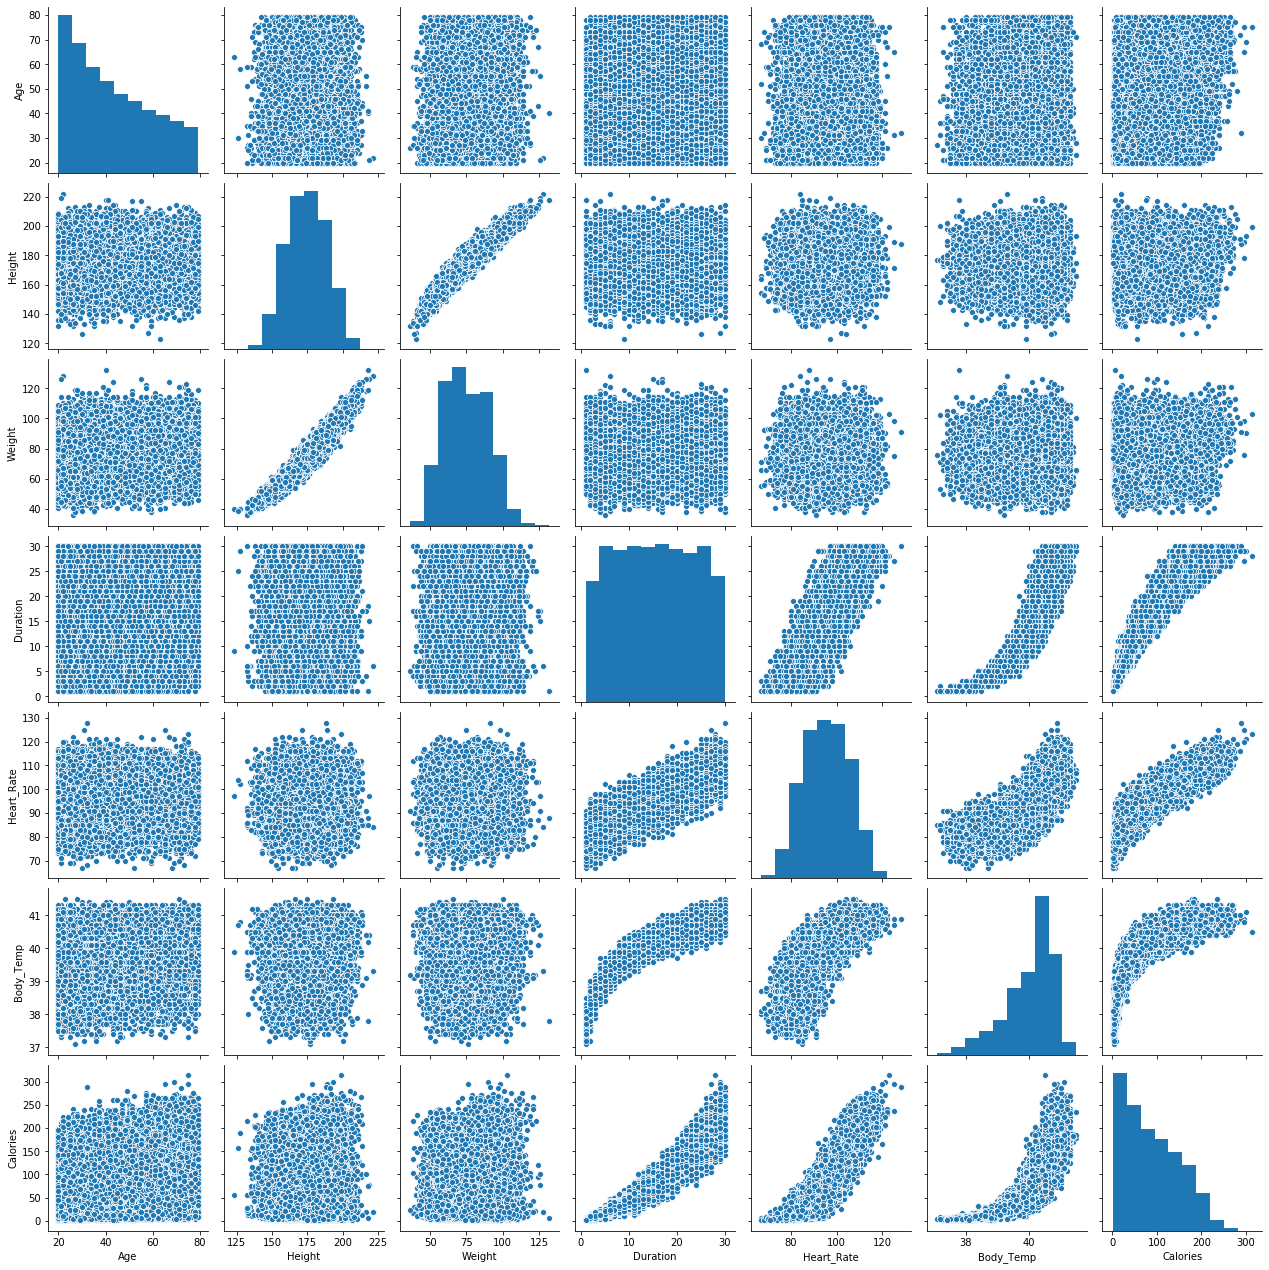

In [17]:
sns.pairplot(df.iloc[:,1:])

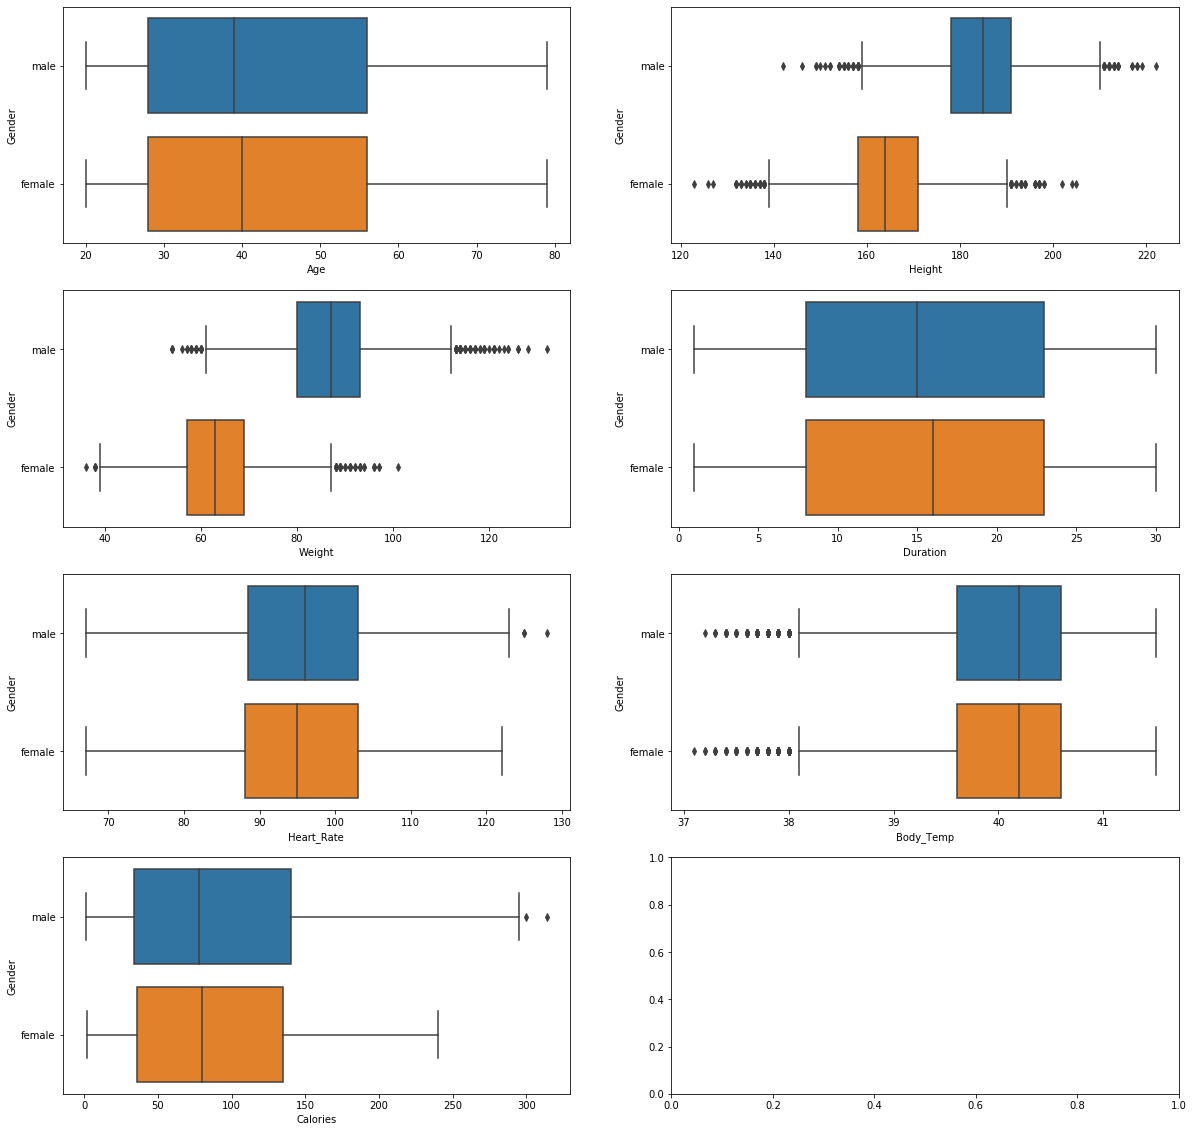

In [18]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
f,j=0,0
for i in df.select_dtypes(exclude=object):
    sns.boxplot(y=df['Gender'],x=df[i],ax=ax[f,j])
    if j<2:
        j=j+1
        if j is 2:
            j=0
            f=f+1

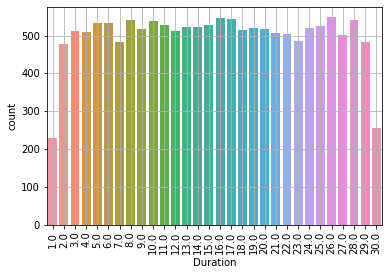

In [19]:
sns.countplot(df.Duration)
plt.xticks(rotation=90)
plt.grid()

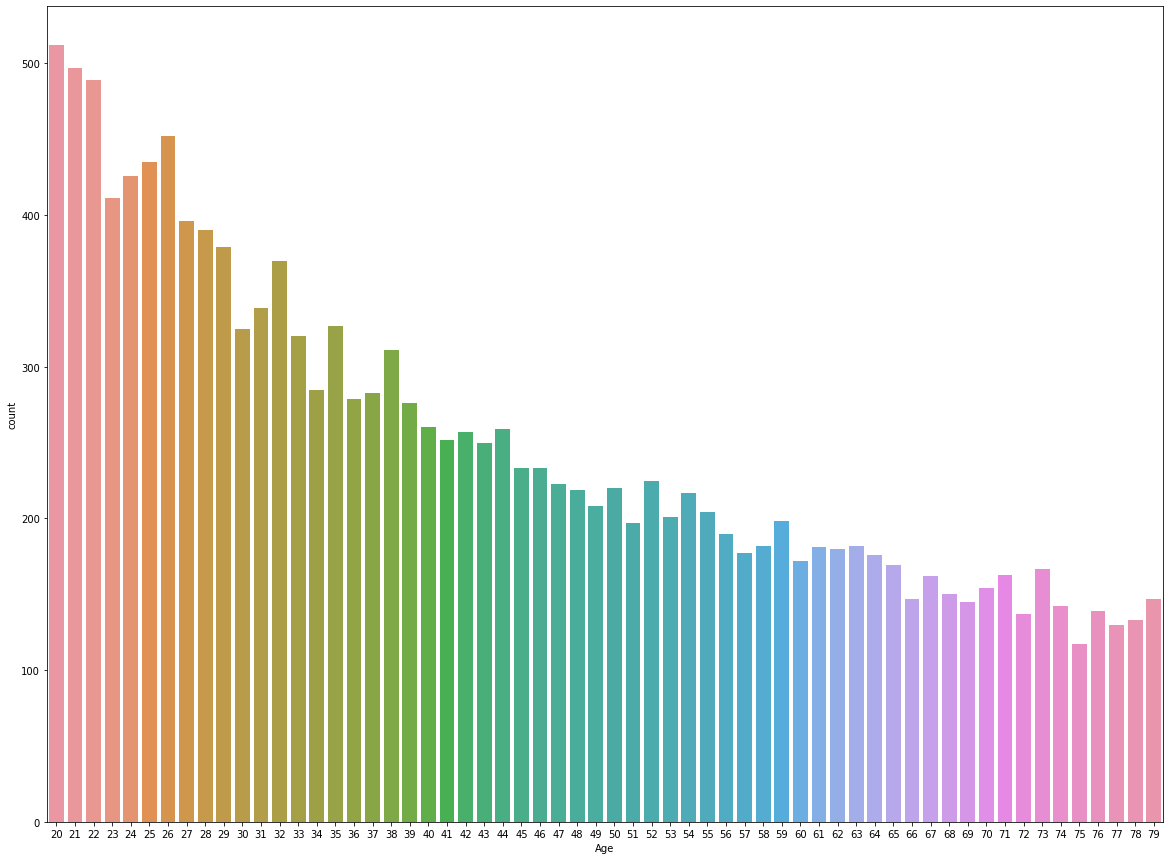

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(df['Age'])

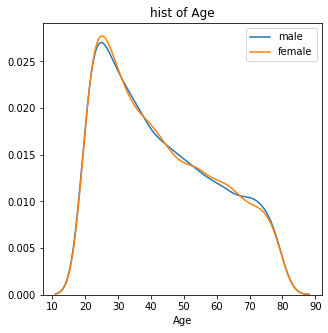

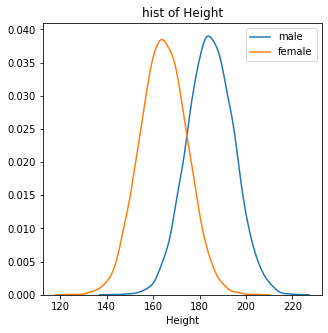

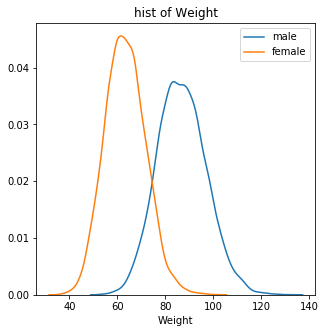

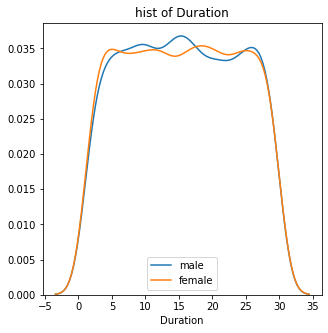

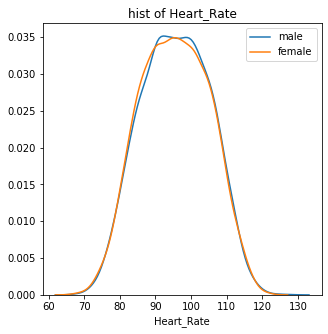

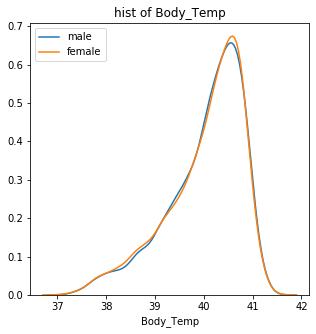

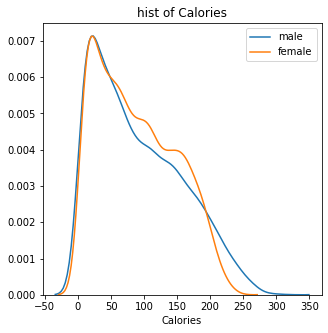

In [36]:
f=0
for i in df.select_dtypes(exclude=object):
    plt.figure(figsize=(5,5))
    sns.distplot(df[df['Gender']=='male'][i],hist=False,label='male')
    sns.distplot(df[df['Gender']=='female'][i],hist=False,label='female')
    plt.title('hist of {0}'.format(df.select_dtypes(exclude=object).columns[f]))
    plt.legend(loc='best')
    f=f+1

### analysis of duration and age

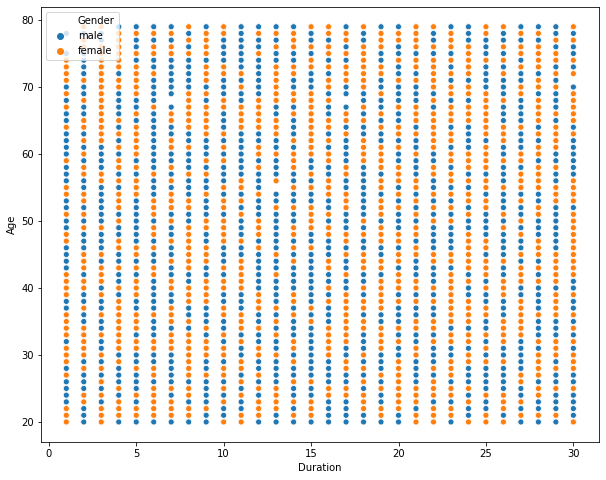

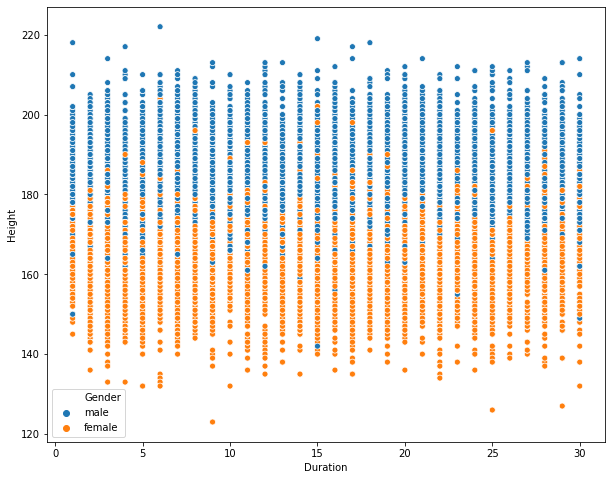

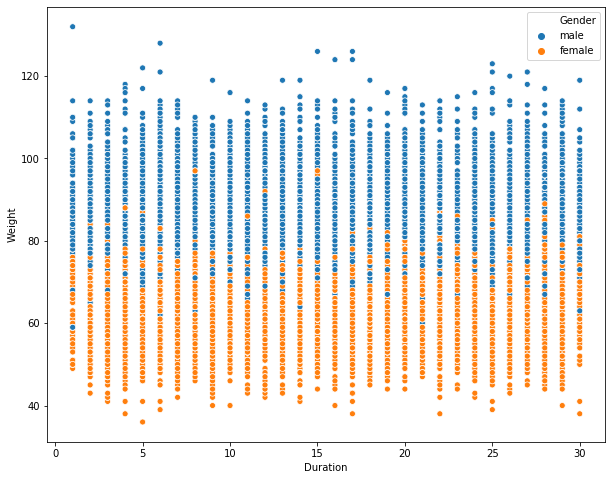

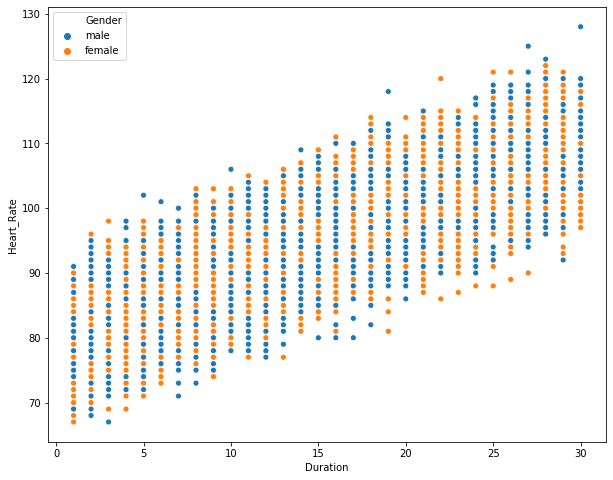

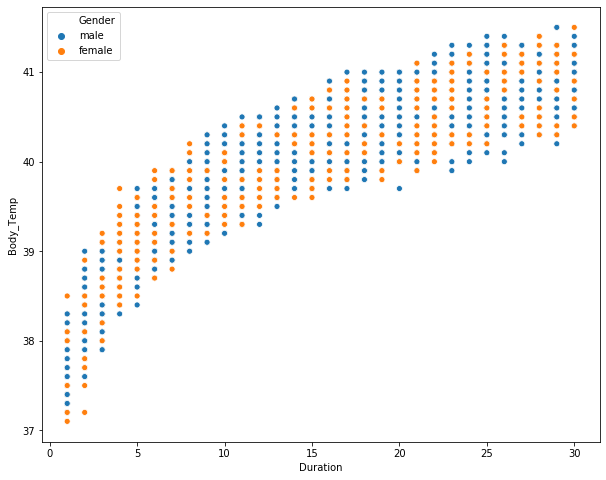

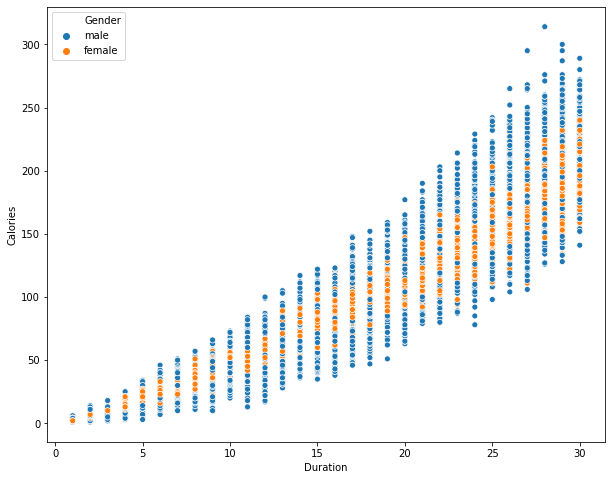

In [40]:
for i in df.select_dtypes(exclude=object).drop('Duration',axis=1):
    plt.figure(figsize=(10,8))
    sns.scatterplot(y=df[i],x=df['Duration'],hue=df['Gender'])

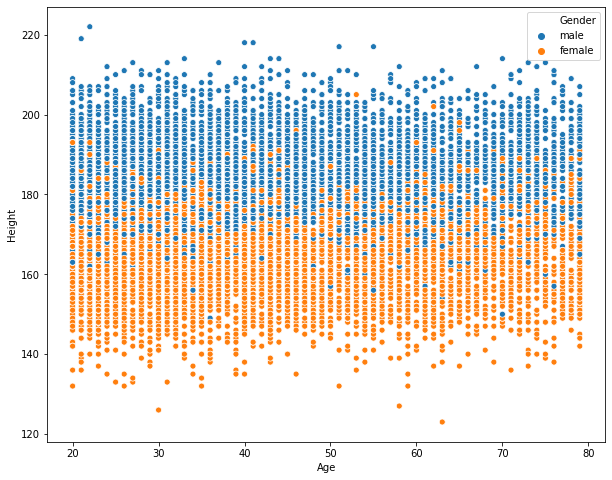

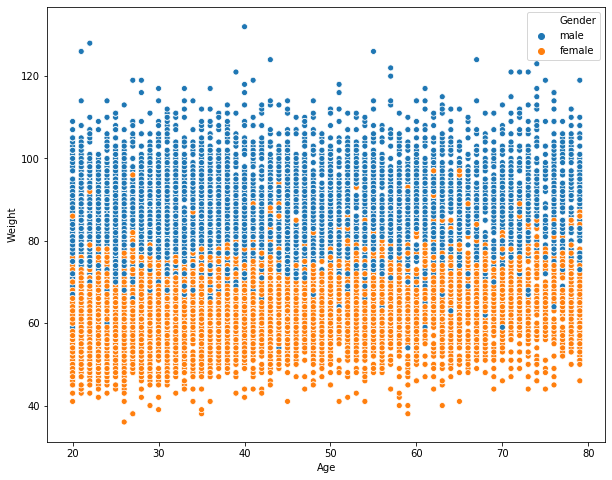

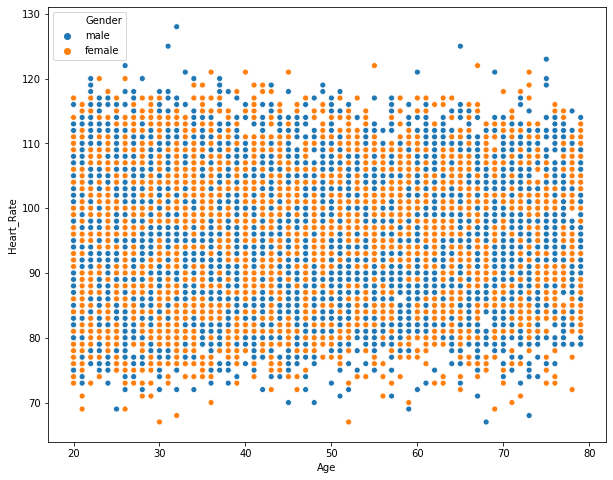

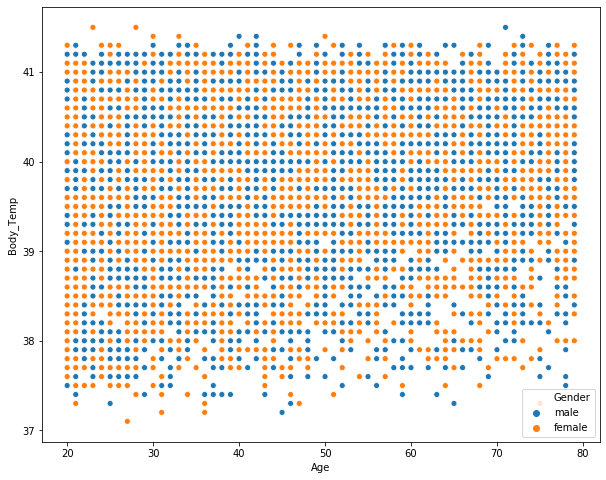

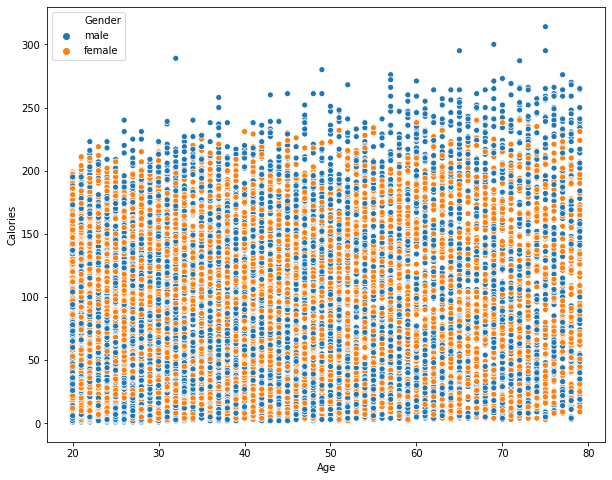

In [38]:
for i in df.select_dtypes(exclude=object).drop(['Duration','Age'],axis=1):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=df['Age'],y=df[i],hue=df['Gender'])

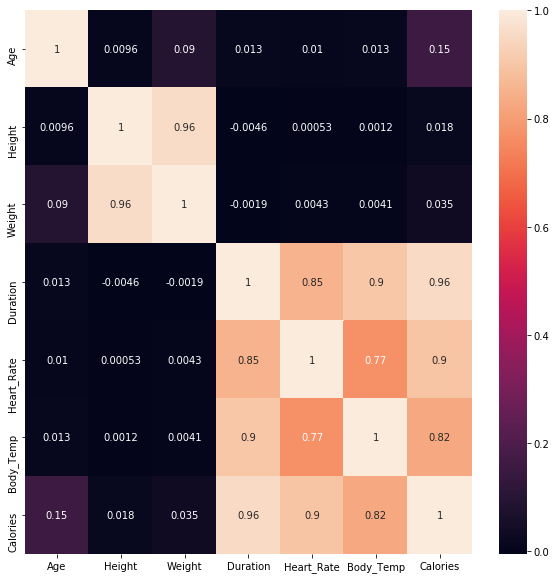

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(exclude=object).corr(),annot=True)